

# Множественная линейная регрессия



Данный код представялет собой анализ некоторого датасета посредством множественной линейной регрессии.
Датасет брался с сайта kaggle.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")

print("Path to dataset files:", path)

100%|██████████| 367/367 [00:00<00:00, 808kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hussainnasirkhan/multiple-linear-regression-dataset/versions/1


Регрессионный анализ — это статистический метод, который помогает выявить и измерить зависимости между различными показателями. Простыми словами, он отвечает на вопрос: как изменение одного параметра влияет на другой.
 Регрессионный анализ строит математическую модель, которая описывает связь между зависимой переменной (результатом) и независимыми переменными (факторами). Это позволяет делать прогнозы, находить скрытые закономерности и принимать обоснованные решения на основе данных.



#Формулы множественной линейной регрессии

 Основное уравнение модели

 $$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \varepsilon$$

где:
 - $y$ - зависимая переменная
 - $x_1, x_2, \dots, x_p$ - независимые переменные
 - $\beta_0$ - свободный член
 - $\beta_1, \beta_2, \dots, \beta_p$ - коэффициенты регрессии
 - $\varepsilon$ - ошибка (остатки)

#Матричная форма

 $$\mathbf{Y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$$

 где:
 - $\mathbf{Y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$ - вектор целевых переменных $(n \times 1)$
 - $\mathbf{X} = \begin{bmatrix}
     1 & x_{11} & x_{12} & \cdots & x_{1p} \\
     1 & x_{21} & x_{22} & \cdots & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     1 & x_{n1} & x_{n2} & \cdots & x_{np}
 \end{bmatrix}$ - матрица признаков $(n \times (p+1))$
 - $\boldsymbol{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{bmatrix}$ - вектор коэффициентов $((p+1) \times 1)$
 - $\boldsymbol{\varepsilon} = \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{bmatrix}$ - вектор ошибок $(n \times 1)$
# Метрики качества регрессии

##  Mean Absolute Error (MAE) - Средняя абсолютная ошибка

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

 где:
 - $y_i$ - истинное значение
 - $\hat{y}_i$ - предсказанное значение
 - $n$ - количество наблюдений



##  Mean Squared Error (MSE) - Средняя квадратичная ошибка

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

## Root Mean Squared Error (RMSE) - Корень из средней квадратичной ошибки

 $$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$


## R² Score (Coefficient of Determination) - Коэффициент детерминации

 $$R^2 = 1 - \frac{SSR}{SST} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

 где:
 - $SSR$ - Sum of Squared Residuals (остаточная сумма квадратов)
 - $SST$ - Total Sum of Squares (общая сумма квадратов)
 - $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$ - среднее значение целевой переменной


### Подключаем библиотеки

In [2]:
#Библиотеки для работы с данными

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts


#Библиотеки для регрессионой модели

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , root_mean_squared_error

### Обработка датасета

In [3]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/hussainnasirkhan/multiple-linear-regression-dataset/versions/1/multiple_linear_regression_dataset.csv')
print(f"\nПервые 5 строк\n{df.head()}")

print("Общая информация")
print(df.info())

print(f"\nСтатистика\n{df.describe()}")


Первые 5 строк
   age  experience  income
0   25           1   30450
1   30           3   35670
2   47           2   31580
3   32           5   40130
4   43          10   47830
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes
None

Статистика
             age  experience        income
count  20.000000   20.000000     20.000000
mean   39.650000    6.200000  40735.500000
std    10.027725    4.124382   8439.797625
min    23.000000    1.000000  27840.000000
25%    31.500000    3.750000  35452.500000
50%    40.000000    5.000000  40190.000000
75%    47.000000    9.000000  45390.000000
max    58.000000   17.000000  63600.000000


Датасет содержит столбцы:
- age (возраст)
- experience (опыт)
- income (доход)

### Посмотрим график рассеяния.

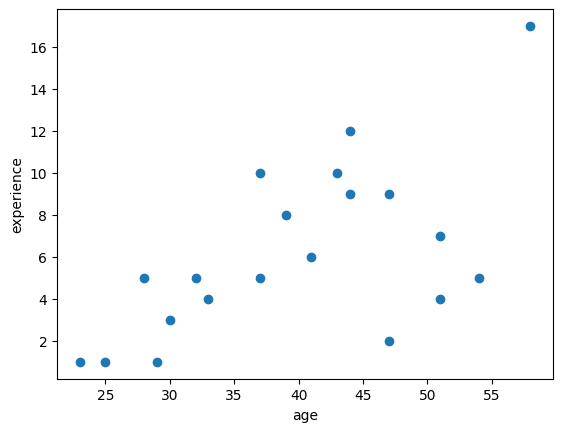

In [ ]:
plt.scatter(x = 'age',y='experience',data=df)
plt.xlabel('age')
plt.ylabel('experience')
plt.show()

###Построим гисторгаммы

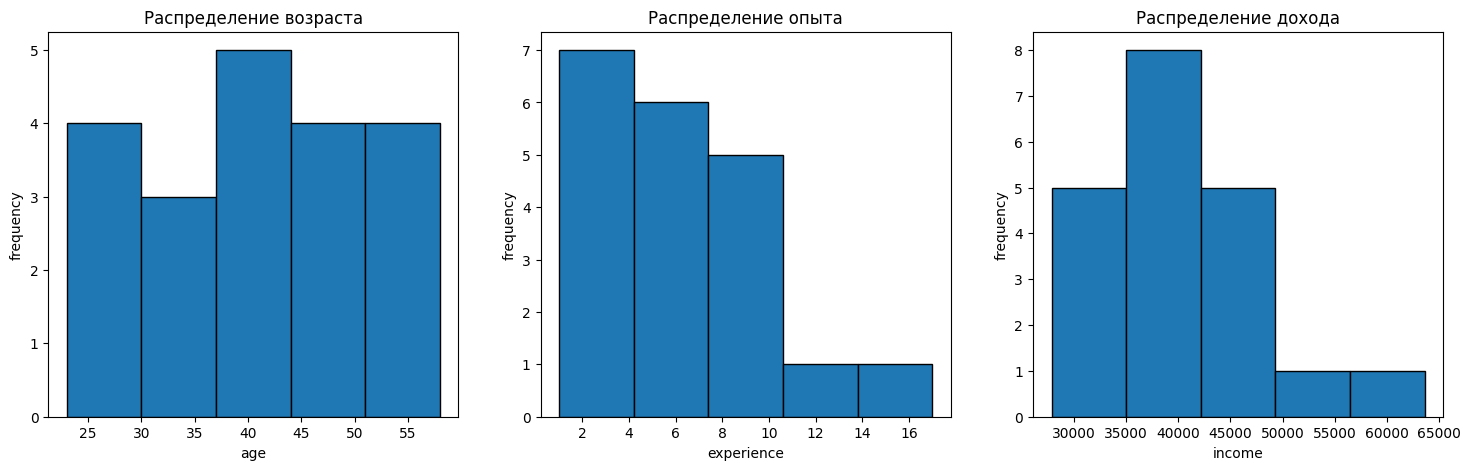

In [ ]:
figure,axes = plt.subplots(1,3,figsize=(18,5))
axes[0].hist(df['age'],bins=5, edgecolor='black', linewidth=1)
axes[0].set_xlabel('age')
axes[0].set_ylabel('frequency')
axes[0].set_title('Распределение возраста')

axes[1].hist(df['experience'],bins=5, edgecolor='black', linewidth=1)
axes[1].set_xlabel('experience')
axes[1].set_ylabel('frequency')
axes[1].set_title('Распределение опыта')

axes[2].hist(df['income'],bins=5, edgecolor='black', linewidth=1)
axes[2].set_xlabel('income')
axes[2].set_ylabel('frequency')
axes[2].set_title('Распределение дохода')

plt.show()

###Разобьем датасет на зависмые и независимые переменные,а также построим и обучим модель

In [ ]:
X = df[['age','experience']]
X

,age,experience
0,25,1
1,30,3
2,47,2
3,32,5
4,43,10
5,51,7
6,28,5
7,33,4
8,37,5
9,39,8


In [ ]:
y = df['income']
y

,income
0,30450
1,35670
2,31580
3,40130
4,47830
5,41630
6,41340
7,37650
8,40250
9,45150


Средняя абсолютная ошибка = 733.8346
Средняя квадратичная ошибка = 926088.6432
Корень из средней квадратичной ошибки = 962.3350
Коэффициент детерминации = 0.9672


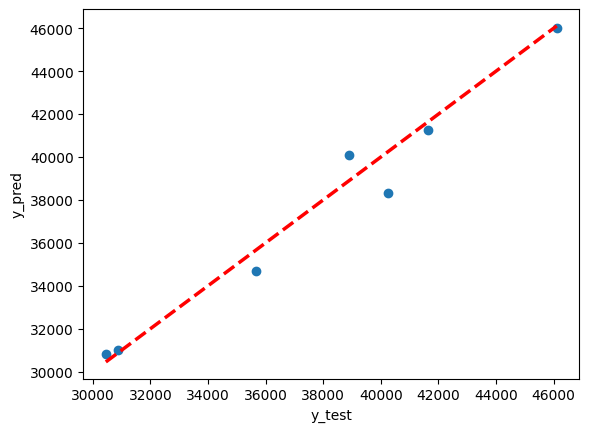

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.350,random_state=42)
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
y_pred = linear_reg.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Средняя абсолютная ошибка = {mae:.4f}")
print(f"Средняя квадратичная ошибка = {mse:.4f}")
print(f"Корень из средней квадратичной ошибки = {rmse:.4f}")
print(f"Коэффициент детерминации = {r2:.4f}")

plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

По полученным значениям и графику можно сказать, что модель достаточно точно описывает данные

Теперь оценим значимость модели с помощью F-критерия.
Проверим гипотезу
$H_0: \beta_1 = \beta_2 = 0$
Альтернативной гипотезой будет:
$H_1: ∃\beta_r \neq 0$

Формула для криетрия:
$F = \frac{MSR}{MSE}$
где MSR является средней суммой квадратов регрессии

In [ ]:
SSR = np.sum((y_pred - np.mean(y_test))**2)
k = X_test.shape[1] #число независмых переменных
MSR = SSR/k

F = MSR/mse
print(f"F-статистика = {F:.4f}")

F-статистика = 101.8231


Опредлеим F-критическое.Пусть уровень значимиости α=0.05

$F_{\text{крит}}(1 - \alpha ,\, df_1 ,\, df_2 )$


In [ ]:
n = len(X_test)
df1 = k
df2 = n - k - 1
a = 0.05
F_crit = sts.f.ppf(1 - a, df1, df2)
print(f"F-критическое = {F_crit:.4f}")

F-критическое = 6.9443


###Как мы можем заменить F-статистика оказалась много больше F-критического,следовательно мы отклоняем нулевую гипотезу и принимаем альтернативную.Из этого делаем вывод ,что полученная модель значима

Теперь проверим каждый коэффицент по отдельности и определим какая независимая переменная вносит больший вклад.
Проверим гипотезу $H_0$: $\beta_r = 0$

Альтернативная $H_1 : \beta_r \neq 0$


In [ ]:
X_with_const = np.column_stack([np.ones(n), X_test])
xtx_inv = np.linalg.inv(X_with_const.T @ X_with_const)
var_coef = mse * xtx_inv
se_coef = np.sqrt(np.diag(var_coef))


coefficients = np.concatenate([[linear_reg.intercept_], linear_reg.coef_])
t_stats = coefficients / se_coef

p_values = 2 * (1 - sts.t.cdf(np.abs(t_stats), n - k - 1))
table_with_stats = pd.DataFrame(data=[t_stats,p_values],columns=['beta_0','beta_1','beta_2'],index=['t_stats','p_values'])
table_with_stats

,beta_0,beta_1,beta_2
t_stats,11.952073,-0.821366,5.094104
p_values,0.000281,0.457572,0.007011


###По полученным значениям P-values можно сказать ,что $\beta_0$ и $\beta_2$ имеют высокую значимость , а $\beta_1$ нет.Из этого следует ,что опыт работы важнее и имеет большее влияние на доход ,чем возраст, на основе данного датасета.

##Итоговый анализ модели свидетельствует о её хорошей точности и значимости